# Sentiment Analysis on IMDB movie reviews

Context: A movie review dataset. NLP tasks Sentiment Analysis.<br>
Note : all the movie review are long sentence(most of them are longer than 200 words.)<br>
Content: two columns used (text : the review of the movie and label : the sentiment label of the movie review)

Model output: 0 if negative review and 1 if positive review 

kaggle dataset: https://www.kaggle.com/columbine/imdb-dataset-sentiment-analysis-in-csv-format

Made by: Russel John E.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from tqdm import tqdm
%matplotlib inline

import warnings

warnings.filterwarnings('ignore')

sns.set_style('darkgrid')

In [2]:
df_train = pd.read_csv('Train.csv')
df_test = pd.read_csv('Valid.csv')
df = pd.concat([df_train, df_test]).sample(frac = 1).reset_index(drop=True)
df

,text,label
0,When an attempt is made to assassinate the Emi...,0
1,I am an avid movie watcher and I enjoy a wide ...,0
2,The people who are praising this film are the ...,0
3,"This movie is cold, bare truth. Often we think...",1
4,Jean Dujardin gets Connery's mannerisms down p...,1
...,...,...
44995,"Nothing really unpredictable in this movie, bu...",1
44996,"Yep, this has got to be one of the lamest movi...",0
44997,This anime series starts out great: Interestin...,0
44998,"""The Cat's Meow"" contains a few scenes that bo...",0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    45000 non-null  object
 1   label   45000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 703.2+ KB


In [4]:
df.isnull().sum()

text     0
label    0
dtype: int64

In [5]:
label_0, label_1 = df['label'].value_counts()

print(f'Label 0: {(label_0/df.shape[0]):.4f}% \nLABEL 1: {(label_1/df.shape[0]):.4f}%')

Label 0: 0.5001% 
LABEL 1: 0.4999%


<AxesSubplot:xlabel='label', ylabel='count'>

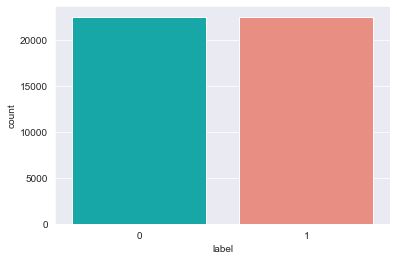

In [6]:
sns.countplot(x=df['label'], palette = ["c" , "Salmon"])

# Insights
No need to perform any data imputation or any balancing techniques

# Data Transformation

Using the package nltk (natural language tool kit), I utilize different methods to transform my text data into a cleaned one which can significantly help for my model creation.

In [7]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer

In [8]:
def clean_tokenize_stop(text):
    
    #Removes Unnecessary characters and only collects alphabets or numbers
    regexp = RegexpTokenizer('\w+')
    cleaned = regexp.tokenize(text.lower()) #transform text into lower cases
        
    #Removing stopwords or common words which dont add any meaning
    stopwords = nltk.corpus.stopwords.words("english")
    stopwords.extend(['movies', 'movie', 'im', 'film', 'br']) #extending my stopwords
    cleaned2 = [item for item in cleaned if item not in stopwords]
    
    #Performing lemmatization(reverting a word to its base form) which is better than stemming 
    wordnet_lem = WordNetLemmatizer()
    cleaned3 = [wordnet_lem.lemmatize(item) for item in cleaned2] # running runs
    
    cleaned4 = ' '.join([word for word in cleaned3]) 
                
    return cleaned4

In [9]:
df['text'] = df['text'].apply(clean_tokenize_stop)

In [10]:
df

,text,label
0,attempt made assassinate emir ohtar arab poten...,0
1,avid watcher enjoy wide variety film however f...,0
2,people praising real disappointment hoping lea...,0
3,cold bare truth often think oh happen drug smu...,1
4,jean dujardin get connery mannerism pat adjust...,1
...,...,...
44995,nothing really unpredictable solid flick respe...,1
44996,yep got one lamest ever seen utterly tasteless...,0
44997,anime series start great interesting story exc...,0
44998,cat meow contains scene boast intelligent dial...,0


# Words Frequency Distribution
Im going to plot the frequency or the number of times the word appeared in the corpus.

In [11]:
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

allwords = ' '.join([word for word in df['text']]) # ['feel', 'family']
words = word_tokenize(allwords)
fd = FreqDist(words)

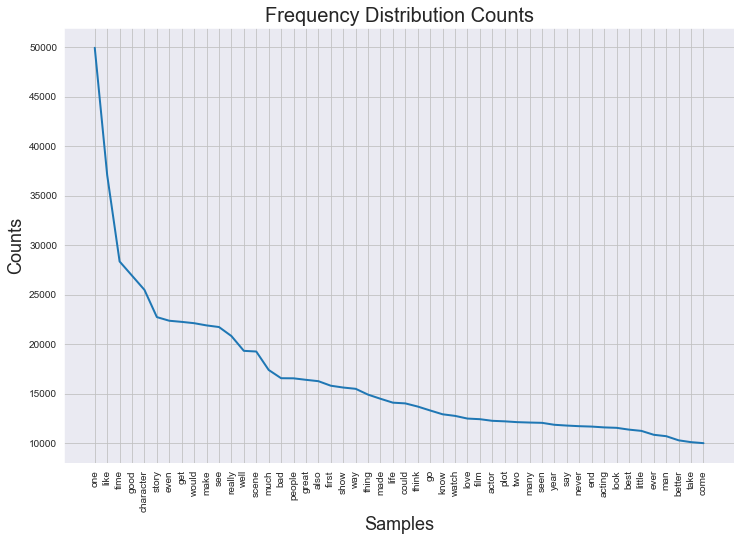

<AxesSubplot:title={'center':'Frequency Distribution Counts'}, xlabel='Samples', ylabel='Counts'>

In [12]:
# Plotting the frequency counts
plt.figure(figsize=(12,8))
plt.title('Frequency Distribution Counts', fontdict={'size': 20})
plt.xlabel('Words', fontdict={'size': 18})
plt.ylabel('Counts', fontdict={'size': 18})
fd.plot(50, cumulative =False)

(-0.5, 799.5, 499.5, -0.5)

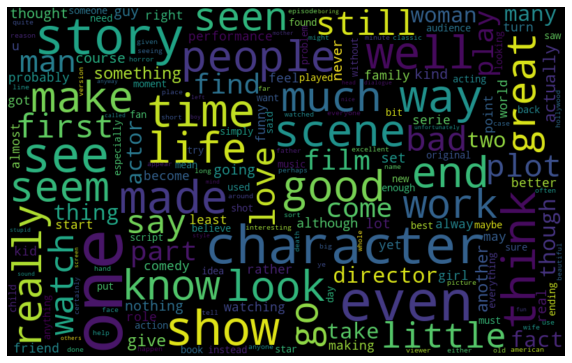

In [13]:
#Plotting some word Cloud
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, 
                     height=500, 
                     random_state=2, 
                     max_font_size=100).generate(allwords)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

# Model Creation

Splitting of data part where i will train my Sentiment Analysis model predictor using Tf-idf Vectorizer and utilizing 5 machine learning techniques with the use of pipeline to make my code clean.

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [15]:
x = df['text']
y = df['label']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3) #test size is 30%

In [16]:
# Pipeline creation 

pipe_NB = Pipeline([
    ('cv1', TfidfVectorizer()),
    ('NB', MultinomialNB())
])

pipe_LR = Pipeline([
    ('cv2', TfidfVectorizer()),
    ('LR', LogisticRegression())
])

pipe_GB = Pipeline([
    ('cv3', TfidfVectorizer()),
    ('GB', GradientBoostingClassifier())
])

pipe_RF = Pipeline([
    ('cv4', TfidfVectorizer()),
    ('RF', RandomForestClassifier())
])

pipe_KNN = Pipeline([
    ('cv5', TfidfVectorizer()),
    ('DT', KNeighborsClassifier())
])

pipelines = [pipe_NB, pipe_LR, pipe_GB, pipe_RF, pipe_KNN]
pipelines

[Pipeline(steps=[('cv1', TfidfVectorizer()), ('NB', MultinomialNB())]),
 Pipeline(steps=[('cv2', TfidfVectorizer()), ('LR', LogisticRegression())]),
 Pipeline(steps=[('cv3', TfidfVectorizer()),
                 ('GB', GradientBoostingClassifier())]),
 Pipeline(steps=[('cv4', TfidfVectorizer()), ('RF', RandomForestClassifier())]),
 Pipeline(steps=[('cv5', TfidfVectorizer()), ('DT', KNeighborsClassifier())])]

# Model Evaluation Part 

I used accuracy as a metric because the dataset is balance.

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [05:56<00:00, 71.24s/it]


Text(0, 0.5, 'Accuracy (percentage)')

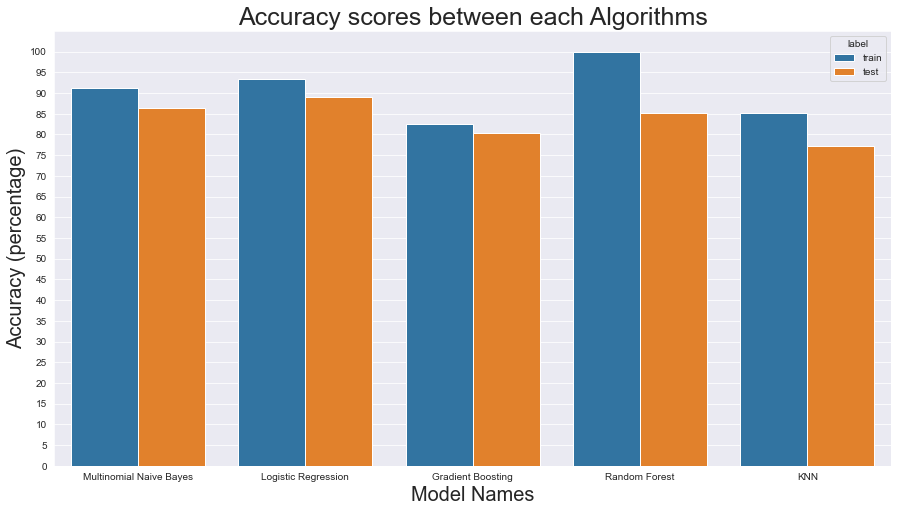

In [17]:
#Data Fitting and Testing
pipe_names = ['Multinomial Naive Bayes', 'Logistic Regression', 'Gradient Boosting', 'Random Forest', 'KNN']
train_acc = []
val_acc = []

for pipe in tqdm(pipelines):
    pipe.fit(x_train, y_train)
    train_acc.append(pipe.score(x_train, y_train)*100)
    val_acc.append(pipe.score(x_test, y_test)*100)
    
data_acc = pd.DataFrame({
    'names': pipe_names + pipe_names, # [naive,logistic, ...., navive]
    'score': train_acc + val_acc, # [98,97,...,87,88]
    'label' : (['train']*5) + (['test']*5) # [train, train, train, ..., test,test] 
})

plt.figure(figsize=(15,8))
plt.title('Accuracy scores between each Algorithms', fontdict={'fontsize':25})
sns.barplot(data= data_acc, x='names', y='score', hue='label')
plt.xlabel('Model Names', fontdict={'fontsize':20})
plt.yticks(range(0,105,5))
plt.ylabel('Accuracy (percentage)', fontdict={'fontsize':20})

# Optimization 
### Based from the accuracy above, The top 3 models are Naive Bayes, Logistic Regression and Random Forest 

These three models will undergo hyper parameter tuning to see which is the best model out of all three.

In [18]:
from sklearn.model_selection import GridSearchCV, cross_val_score


# Create a pipeline
param_range = [5, 10, 15]
param_range_fl = [0.1, 1, 3]
ngram_range = [(1,1), (2,2)]

pipe = Pipeline([('Vectorizer', TfidfVectorizer())
                ,("classifier", RandomForestClassifier())])

grid_param = [
                {"Vectorizer": [TfidfVectorizer()],
                 "Vectorizer__ngram_range": ngram_range,
                "classifier": [MultinomialNB()],
                 "classifier__alpha": param_range_fl,
                 },
                {
                "Vectorizer": [TfidfVectorizer()],
                 "Vectorizer__ngram_range": ngram_range,
                "classifier": [LogisticRegression()],
                 "classifier__penalty": ['l1', 'l2'],
                 "classifier__C": param_range_fl
                 },
                {
                 "Vectorizer": [TfidfVectorizer()],
                 "Vectorizer__ngram_range": ngram_range,
                "classifier": [RandomForestClassifier()],
                 "classifier__max_depth": param_range,
                 "classifier__min_samples_split": param_range
                }]

gridsearch = GridSearchCV(pipe, grid_param, cv=5, n_jobs=-1, scoring='accuracy') 
best_model = gridsearch.fit(x_train,y_train)

In [19]:
cols = ['mean_fit_time', 'param_classifier', 'mean_test_score', 'rank_test_score']
pd.DataFrame(best_model.cv_results_)[cols].sort_values(by='rank_test_score').head()

,mean_fit_time,param_classifier,mean_test_score,rank_test_score
11,7.000196,LogisticRegression(C=3),0.894825,1
9,6.076062,LogisticRegression(C=3),0.890984,2
4,19.455492,MultinomialNB(),0.877079,3
3,18.105610,MultinomialNB(),0.872762,4
5,17.798131,MultinomialNB(),0.871048,5


In [20]:
best_model.best_params_

{'Vectorizer': TfidfVectorizer(),
 'Vectorizer__ngram_range': (1, 1),
 'classifier': LogisticRegression(C=3),
 'classifier__C': 3,
 'classifier__penalty': 'l2'}

In [21]:
best_model = Pipeline([
    ('cv2', TfidfVectorizer(ngram_range=(1,1))),
    ('LR', LogisticRegression(penalty='l2', C=3))
])
best_model.fit(x_train, y_train)

Pipeline(steps=[('cv2', TfidfVectorizer()), ('LR', LogisticRegression(C=3))])

# Results
TEST VALIDATION, CLASSIFICATION REPORT, CONFUSION MATRIX, ROC CURVE.

In [22]:
df_check = pd.read_csv('Test.csv')
x_test_t = df_check['text'].apply(clean_tokenize_stop)
y_test_t = df_check['label']

In [23]:
trac = cross_val_score(best_model, x_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)
valac = cross_val_score(best_model, x_test, y_test, cv=5, scoring='accuracy', n_jobs=-1)
tesac = cross_val_score(best_model, x_test_t, y_test_t, cv=5, scoring='accuracy', n_jobs=-1)

Text(0, 0.5, 'Accuracy (percentage)')

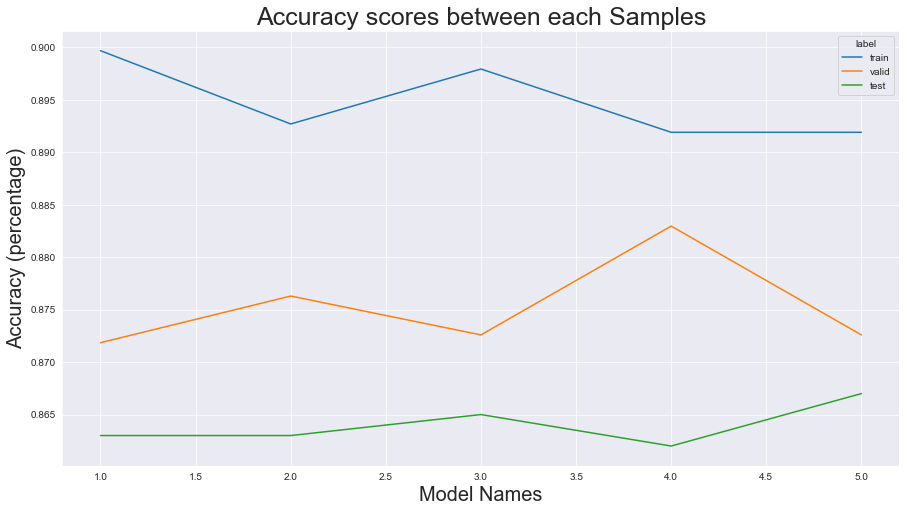

In [24]:
model_data_acc = pd.DataFrame({
    'score': np.concatenate([trac,valac, tesac]),
    'label': ['train']*5 + ['valid'] * 5 + ['test'] * 5,
    'epochs': list(range(1, 6)) + list(range(1, 6)) + list(range(1, 6))
})

plt.figure(figsize=(15,8))
plt.title('Accuracy scores between each Samples', fontdict={'fontsize':25})
sns.lineplot(data= model_data_acc, x='epochs', y='score', hue='label')
plt.xlabel('Model Names', fontdict={'fontsize':20})
plt.ylabel('Accuracy (percentage)', fontdict={'fontsize':20})

In [25]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

y_pred = best_model.predict(x_test_t)
print(classification_report(y_test_t, y_pred)) #ground truth, predicted labels

              precision    recall  f1-score   support

           0       0.90      0.89      0.90      2495
           1       0.89      0.91      0.90      2505

    accuracy                           0.90      5000
   macro avg       0.90      0.90      0.90      5000
weighted avg       0.90      0.90      0.90      5000



Text(115.0, 0.5, 'Ground Truth')

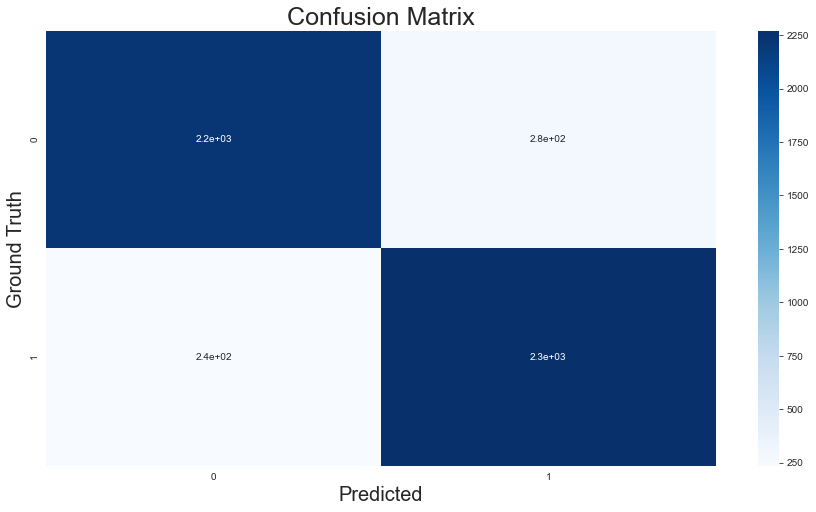

In [26]:
cm = confusion_matrix(y_test_t,y_pred)
plt.figure(figsize=(15, 8))
plt.title('Confusion Matrix', fontdict={'fontsize':25})
sns.heatmap(cm, annot=True, cmap=plt.cm.Blues)
plt.xlabel('Predicted', fontdict={'fontsize':20})
plt.ylabel('Ground Truth', fontdict={'fontsize':20})

<AxesSubplot:title={'center':'Precision-Recall Curve'}, xlabel='Recall', ylabel='Precision'>

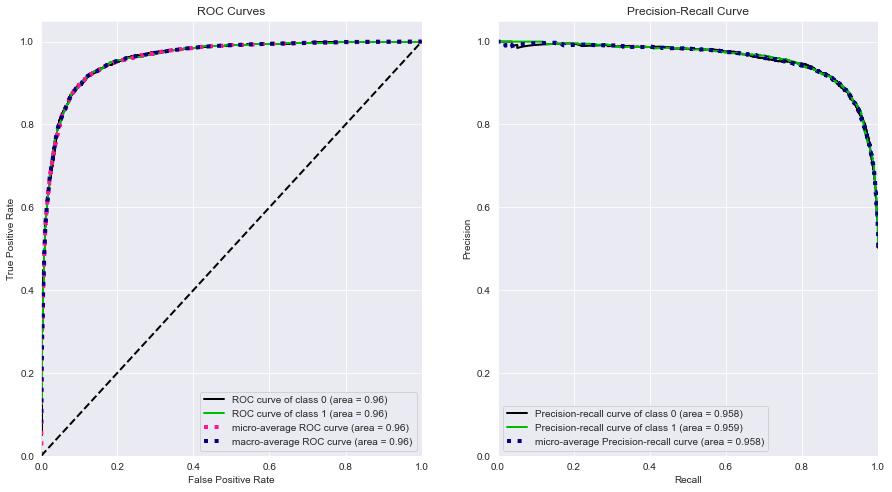

In [27]:
import scikitplot as skplt

y_probas = best_model.predict_proba(x_test_t)
fig,ax = plt.subplots(1,2, figsize=(15,8))
skplt.metrics.plot_roc_curve( y_test_t, y_probas, ax=ax[0])
skplt.metrics.plot_precision_recall_curve(y_test_t, y_probas, ax=ax[1])

In [28]:
best_scores = []
best_labels = ['train', 'valid', 'test']

best_scores.append(best_model.score(x_train, y_train))
best_scores.append(best_model.score(x_test, y_test))
best_scores.append(best_model.score(x_test_t, y_test_t))

Text(0, 0.5, 'Accuracy')

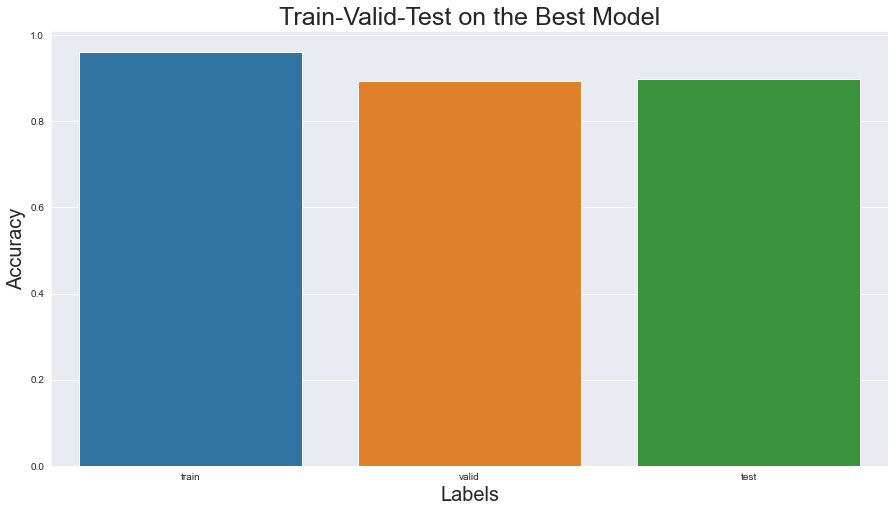

In [29]:
plt.figure(figsize=(15, 8))
plt.title('Train-Valid-Test on the Best Model', fontdict={'fontsize':25})
sns.barplot(x=best_labels, y=best_scores)
plt.xlabel('Labels', fontdict={'fontsize':20})
plt.ylabel('Accuracy', fontdict={'fontsize':20})

# COMPARE MODEL TO NLTK SENTIMENT PACKAGE

Comparing my model (TF_IDF VECTOR - Logistic Regression) to nltk's Sentiment Intensity Analyzer 

In [30]:
from nltk.sentiment import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()
df_check = pd.read_csv('Test.csv')

df_check['polarity'] = df_check['text'].apply(lambda x: sia.polarity_scores(x))
df_check = pd.concat([df_check.drop(['polarity'], axis=1), 
                      df_check['polarity'].apply(pd.Series)], axis=1)
df_check['sentiment'] = df_check['compound'].apply(lambda x: 1 if x > 0 else 0)

accuracy = accuracy_score(df_check['sentiment'], df_check['label'])
print(f'Accuracy of SIA: {(accuracy*100):.2f}%')

Accuracy of SIA: 69.30%


Text(0, 0.5, 'Accuracy')

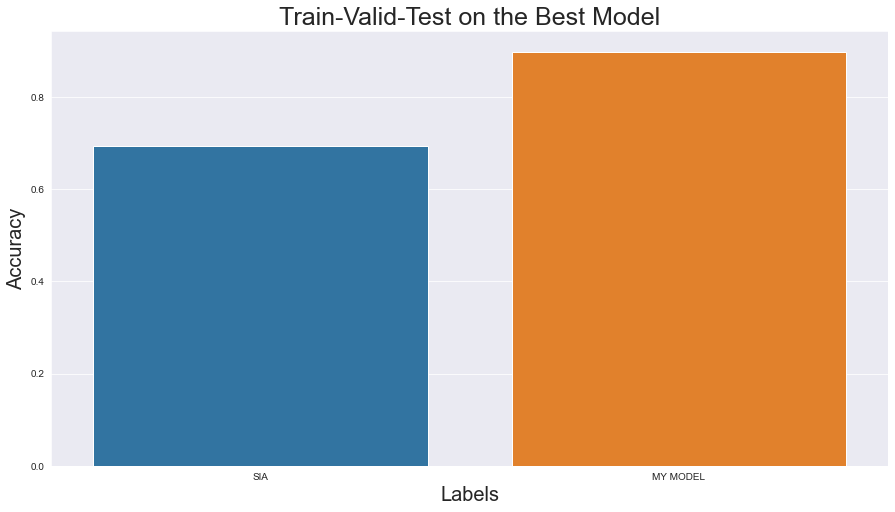

In [31]:
score_1 = accuracy
score_2 = best_model.score(x_test_t, y_test_t)

scores = [score_1, score_2]
labels = ['SIA', 'MY MODEL']

plt.figure(figsize=(15, 8))
plt.title('Train-Valid-Test on the Best Model', fontdict={'fontsize':25})
sns.barplot(x=labels, y=scores)
plt.xlabel('Labels', fontdict={'fontsize':20})
plt.ylabel('Accuracy', fontdict={'fontsize':20})

# Conclusion

My model performed better than the nltk sentiment package. However, Several factors may affect this including the data manipulation in order to balance the labels and lack of hyperparameter tuning.

# Testing and Deployment

In [32]:
# All positive reviews
test1 = 'With its Lin Manuel Miranda songs topping the music chartseveryone is dancing to Brunothe time is now to see this burst of animated family enchantment. Miranda gives this Oscar favorite a heart that sings and a spirit that soars.'
test2 = 'Children will be entertained by the younger characters and creatures, and families will appreciate the strong, emotional moments. Encanto is not an animated masterpiece, but it has enough unique flourishes to avoid mediocrity.'
test7 = 'The movie allows for a surprisingly impactful reappraisal of a long-held Spidey franchise consensus.'
test9 = r"Kennedy not only builds a case against Boeing but offers an object lesson in the tragic consequences of corporate greed and hubris"
test10 = r"A must-see documentary which is conventional to a fault but about as solid an indictment of corporate greed as could be wished for."

#All negative reviews
test3 = 'For all the effort that has gone into ensuring representation in the casting, the storytelling, with its forced flashbacks and synthetic sentiment, lets the whole thing down.'
test4 = r"Gorgeous and vacant, The Eternals is the most numbing entry in Marvel's 13-year-old MCU franchise -- even as it struggles to be its weirdest and most philosophical."
test5 = r"Marvel Studios' Eternals is a rare misfire. However, it has a few redeeming qualities. Chlo Zhao had some clear ambition, but the film fails to come together with likable, meaningful characters or a truly engaging plot"
test6 = 'Eternals is nothing short of a disaster.'

#error
test8 = r"This is a cautionary tale, about what happens when companies start selling a name instead of the goods and services it’s supposed to represent."
test11 = 'Uncharted isn’t even especially good fan service.'


if best_model.predict([test11])[0] == 0:
    print('The review is negative')
else:
    print('The review is positive')

The review is positive


# Insights

The model failed to capture the grammatical context because it only uses unigram word bagging.

In [33]:
import joblib

filename = 'model/finalized_model.pkl'
joblib.dump(best_model, filename)

['model/finalized_model.pkl']

In [34]:
joblib_LR_model = joblib.load(filename)

In [35]:
np.round(joblib_LR_model.score(x_test_t, y_test_t),2)*100

90.0